# Introduction

While the gym can be a core tool in developing fitness routines, the initial learning curve to using the different equipment, as well as the financial barrier of gym memberships and fees can make it difficult to access. Calisthenics and bodyweight fitness provide an alternative method of engaging in exercise, requiring no specialized equipment or purchases to participate. In this project, I aim to analyze gym/exercise data to gather better understanding of how bodyweight fitness stands against exercises that require additionally equipment.

I will be using the [Gym Exercise Dataset from Kaggle](https://www.kaggle.com/datasets/niharika41298/gym-exercise-data) that contains information on different exercises, such as the type of exercise, equipment used, and the difficulty level. This notebook is an exploratory data analysis between different gym exercises, body parts worked, equipment required to perform these exercises, and the aim is to find patterns in the data that might help to understand some of the differences between different approaches to physical fitness.

In [352]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in data

df = pd.read_csv(r'C:\Users\jonat\Documents\Data Projects\megaGymDataset.csv')
df.columns = df.columns.str.replace('Unnamed: 0', 'index')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2918 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


## Data cleaning

Evaluate and replace any missing values, if necessary

In [32]:
missing_values_count = df.isnull().sum()
missing_values_count

index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

Although the missing values in the description column aren't too concerning, I am interested in comparing rating scores between different categories of exercise. However, with 65% of the data missing from the ratings (1887/2918), this feature will be left out for most of analysis. Some brief examination will be done at the end regarding the ratings column, keeping in mind the volume of missing data.

While doing a brief exploration of the dataset, I also noticed that Equipment column has values of **'None'** and of **'Body Only'**. Given the nature of bodyweight-based exercises needing no other equipment besides a person's own body, it seemed redundant to include **'None'** as a potential value. 

In [34]:
df['Equipment'].value_counts()

Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
None               32
E-Z Curl Bar       22
Foam Roll          11
Name: Equipment, dtype: int64

In [35]:
# Changing any 'None' values to 'Body Only' in the Equipment column

df['Equipment'] = df['Equipment'].replace('None','Body Only')

Check for any duplicated rows, and remove if necessary

In [39]:
# Checking for any duplicated rows

sum(df.duplicated())

0

## Data Analysis and Visualization

In [170]:
df.head()

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


To begin with, I look at bar charts of the counts for each unique value among the Type, BodyPart, Equipment, and Level categories to get a sense of how each is distributed.

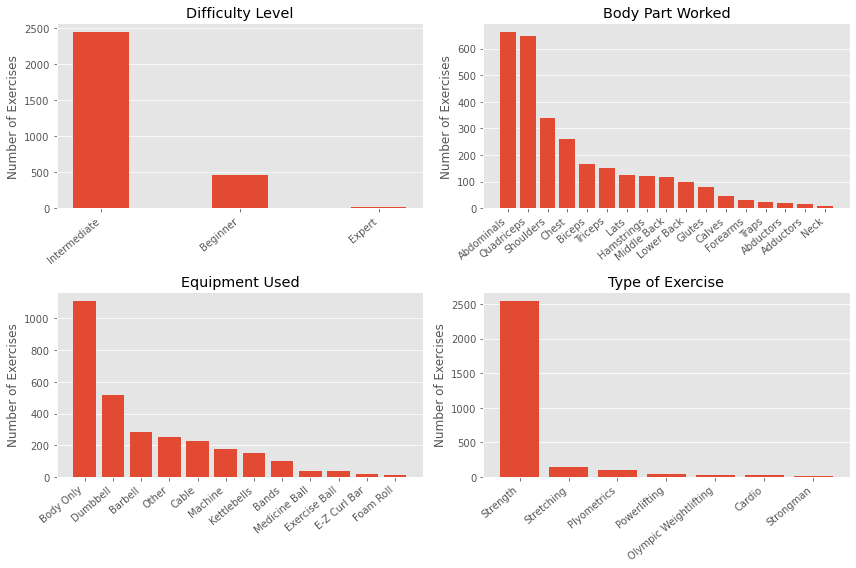

In [259]:
fig, ax = plt.subplots(2, 2)


# For Difficulty Level
ax[0, 0].bar(df['Level'].value_counts().index.tolist(),df['Level'].value_counts(),width=0.4)
ax[0, 0].set_title("Difficulty Level")
  
# For Body Part Worked
ax[0, 1].bar(df['BodyPart'].value_counts().index.tolist(),df['BodyPart'].value_counts())
ax[0, 1].set_title("Body Part Worked")
  
# For Equipment Used
ax[1, 0].bar(df['Equipment'].value_counts().index.tolist(),df['Equipment'].value_counts())
ax[1, 0].set_title("Equipment Used")
  
# For Type of Exercise
ax[1, 1].bar(df['Type'].value_counts().index.tolist(),df['Type'].value_counts())
ax[1, 1].set_title("Type of Exercise")


# 
for i in [0,1]:
    for j in [0,1]:
        plt.setp(ax[i,j].get_xticklabels(), rotation=40, horizontalalignment='right')
        ax[i,j].set_ylabel('Number of Exercises')
        ax[i,j].xaxis.grid([])


# Combine all the operations and display
plt.tight_layout()
plt.show()

From this brief overview, it is clear that overall, most exercises are at an intermediate level of difficulty, with some beginner level exercises and very few expert level movements. This could indicate a higher general barrier to entry for exercise if there are not as many introductory movements available, but with a high retention rate after reaching an intermediate level because of the larger volume of skills to work on and improve over time.

The muscle groups worked most often are the abdominals and the quadriceps. A couple other interesting observations from this are that not all opposing muscle groups (such as adductors vs abductors, biceps vs triceps, hamstrings vs quadriceps) do not all have similar counts between pairs. Working certain muscle groups in excess of its opposing group may lead to imbalances that lead to injury, and it would be interesting to continue analysis into this in the future.

Equipment usage also shows a clear prevalence in body only exercises, possibly reflecting the versatility and accessibility in comparison to the learning curves and financial barrier to entry for incorporating equipment into one's workouts. In addition to the convenience of body only exercises, perhaps it is due to their adaptability that more overall exercises are developed for it in order to target all the different parts of the body--whereas with equipment, many pieces of equipments might have specialized uses and as such don't have as many unique exercises per equipment.
 
Finally, in terms of types of exercises, this dataset shows an everwhelming prevalence in Strength oriented exercises. Although it could be argued that some of the other categories included in this dataset (such as Powerlifting, Strongman, and Olympic Weightlifting) could fall under strength training as well, it is interesting to see the enormous emphasis on strength in comparison to other metrics of physical fitness.

#### Looking at comparisons between workouts using the body only, and ones that need equipment

In [281]:
# Separate data into ones that need no equipment (body only) and ones that need equipment
body_only = df[df.Equipment == 'Body Only']
equip_used = df[df.Equipment != 'Body Only']

print("body_only has "+str(body_only.shape[0])+" rows.")
print("equip_used has "+str(equip_used.shape[0])+" rows.")

body_only has 1110 rows.
equip_used has 1808 rows.


Although the earlier graph showed the overall popularity of body only exercises, it's important to note that there are still more total exercises that use equipment (1110 body only vs 1808 with equipment).

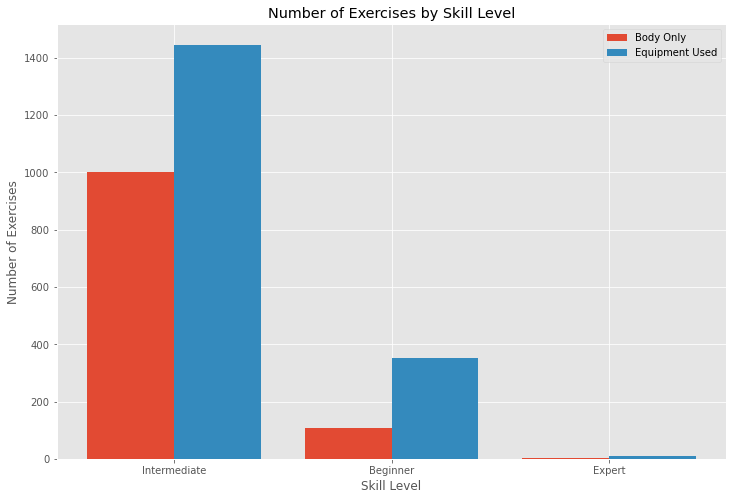

In [336]:
# Looking at the distribution between skill levels
X = df['Level'].value_counts().index.tolist()
body_skill = body_only['Level'].value_counts()
equip_skill = equip_used['Level'].value_counts()
    
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, body_skill, 0.4, label = 'Body Only')
plt.bar(X_axis + 0.2, equip_skill[body_skill.index.to_list()], 0.4, label = 'Equipment Used')
  
plt.xticks(X_axis, X)
plt.xlabel("Skill Level")
plt.ylabel("Number of Exercises")
plt.title("Number of Exercises by Skill Level")
plt.legend()
plt.show()

As expected, since the total number of body only exercises was lower to begin with, the same is seen here. Additionally, a similar distribution between body only vs equipment is seen relative to the skill level of the exercises. Perhaps the interpretations made earlier regarding skill levels could be shifted to be more that beginners do not need a wide variety of exercises; rather, they focus on a smaller set of fundamental exercises to build up towards the intermediate skills.

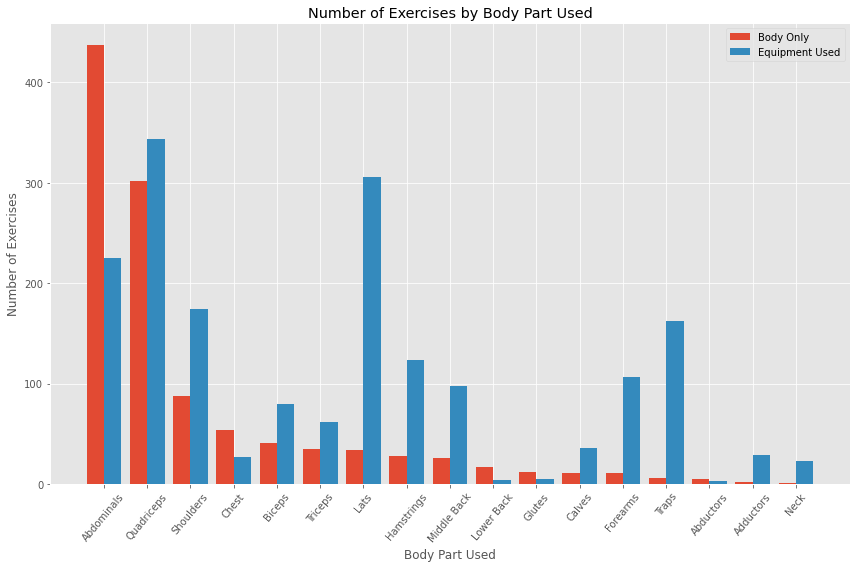

In [344]:
X = df['BodyPart'].value_counts().index.tolist()
body_bodyparts = body_only['BodyPart'].value_counts()
equip_bodyparts = equip_used['BodyPart'].value_counts()
    
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, height = body_bodyparts, width = 0.4, label = 'Body Only')
plt.bar(X_axis + 0.2, height = equip_bodyparts[body_bodyparts.index.to_list()], width = 0.4, label = 'Equipment Used')
  
plt.xticks(X_axis, X,rotation=50)
plt.xlabel("Body Part Used")
plt.ylabel("Number of Exercises")
plt.title("Number of Exercises by Body Part Used")
plt.legend()
plt.tight_layout()
plt.show()

It is interesting to see that the number one body part most used in body only exercises was the abdominals by far. In comparison, the number one body part worked by equipment based exercises (quadriceps) appears to still have less than roughly 100 exercises than the number of abdominal bodyweight based exercises. Despite that there are still more total exercises that use equipment (1110 body only vs 1808 with equipment), for one specific muscle group to come out this far ahead for body only exercises might indicate a core difference in fitness goals for those who follow either type of exercise. If further research is performed to indicate that a difference does exist in fitness goals, businesses could potentially use this information to further fine-tune their workout routines to better match customer wishes.

## Looking at data involving the ratings

Although 65% of the data is missing from the Rating column, doing analysis on the remaining data still returns some interesting observations, which will be explored here.

In [169]:
# Dropping data with missing Rating values
df_nadropped = df[df['Rating'].notna()]
df_nadropped.head()

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
8,8,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
9,9,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
10,10,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average
11,11,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average


In [378]:
# Getting the ratings for body only exercises, and ratings for exercises with equipment
body_rating = df_nadropped[df_nadropped['Equipment']=='Body Only']['Rating']
equip_rating = df_nadropped[df_nadropped['Equipment']!='Body Only']['Rating']

In [387]:
#Quick look at some summary statistics
print(equip_rating.describe())
print(body_rating.describe())

count    733.000000
mean       6.385266
std        3.488780
min        0.000000
25%        5.500000
50%        8.200000
75%        8.800000
max        9.600000
Name: Rating, dtype: float64
count    298.000000
mean       4.774497
std        3.565447
min        0.000000
25%        0.000000
50%        5.350000
75%        8.300000
max        9.400000
Name: Rating, dtype: float64


Conducting a two sample t-test: <br>
$H_{0}$: There is no difference between ratings for body only exercises vs exercises with equipment <br>
$H_{1}$: There is a difference between ratings for body only exercises vs exercises with equipment

In [365]:
# Checking variance
print("The variance of body only is {} and the variance of equipment is {}".format(np.var(body_rating),np.var(equip_rating)))
print("The ratio of the variances is {}".format(np.var(body_rating)/np.var(equip_rating)))
print("Since the ratio is less than 4:1, we can consider the data to have equal variance and proceed with using a t-test")

The variance of body only is 12.669752263411578 and the variance of equipment is 12.15498072731808
The ratio of the variances is 1.0423506665820177
Since the ratio is less than 4:1, we can consider the data to have equal variance and proceed with using a t-test


In [371]:
# Two sample t-test
t_stat, p_value = stats.ttest_ind(a=body_rating, b=equip_rating, equal_var=True)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -6.677646168931385
P-Value:  3.965679448527219e-11


The results indicate a p-value (3.97*10$^{-11}$), less than alpha = 0.05, so we reject the null hypothesis. We have sufficient evidence to conclude that the mean ratings of exercises between body only and with equipment are significantly different.

It would be interesting to look into why this difference in ratings exists between exercises based only on using the body, and exercises that require equipment. Perhaps some of this could be attributed to a perception that using specialized equipment nets a more effective workout, or perhaps the difference could be due to being more committed to the exercises by making the financial investment in equipment or a gym membership. Regardless, it would be helpful to clarify what metrics that the data drew upon in gathering the rankings column. For instance, the ratings could have been made based on the amount of strength that a person increases by using a particular exercise, or maybe the ratings could have simply been based on a person's sense of satisfaction with performing that particular exercise. Getting a better understanding of how these rating data were collected would help for more insightful and useful analysis.